In [1]:
import pandas as pd
import json

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df1 = pd.read_csv("final_all_dataset.csv")

In [3]:
import numpy as np

y = df1['Label']
df1 = df1.drop("Label", axis=1)
X = np.asarray(df1)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [4]:
import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense,RepeatVector,TimeDistributed,Input,BatchNormalization,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam as adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import load_model

In [5]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y_train)

In [6]:
yval1 = to_categorical(y_val)

In [7]:
from keras.layers import GlobalAveragePooling1D
model = Sequential()
model.add(LSTM(128, input_shape=(2,1)))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(1))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(4)))
model.add(GlobalAveragePooling1D())
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics='acc')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 128)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 4)             516       
 ibuted)                                                

In [8]:
X_train

array([[ 1.92048012,  9.10544036],
       [17.6644161 , 17.70781934],
       [42.03050763,  3.        ],
       ...,
       [44.15103776, 14.64439722],
       [43.01075269,  4.66456672],
       [ 5.62140535,  9.45627091]])

In [9]:
history= model.fit(X_train, y,
epochs=50,
batch_size=2048,
validation_data=(X_val,yval1),
shuffle=False)


Epoch 1/50
95/95 [==============================] - 12s 95ms/step - loss: 1.2099 - acc: 0.5366 - val_loss: 1.1870 - val_acc: 0.5398
Epoch 2/50
95/95 [==============================] - 10s 102ms/step - loss: 1.1777 - acc: 0.5387 - val_loss: 1.1622 - val_acc: 0.5393
Epoch 3/50
95/95 [==============================] - 9s 94ms/step - loss: 1.1557 - acc: 0.5399 - val_loss: 1.1409 - val_acc: 0.5412
Epoch 4/50
95/95 [==============================] - 9s 90ms/step - loss: 1.1375 - acc: 0.5402 - val_loss: 1.1218 - val_acc: 0.5442
Epoch 5/50
95/95 [==============================] - 9s 90ms/step - loss: 1.1200 - acc: 0.5402 - val_loss: 1.0972 - val_acc: 0.5370
Epoch 6/50
95/95 [==============================] - 8s 88ms/step - loss: 1.0950 - acc: 0.5473 - val_loss: 1.0612 - val_acc: 0.5578
Epoch 7/50
95/95 [==============================] - 8s 88ms/step - loss: 1.0582 - acc: 0.5631 - val_loss: 1.0096 - val_acc: 0.5779
Epoch 8/50
95/95 [==============================] - 8s 86ms/step - loss: 1.0142 

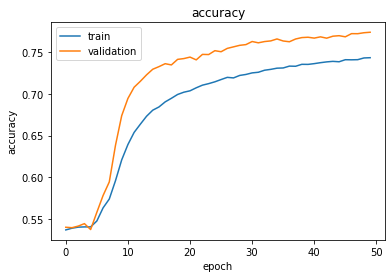

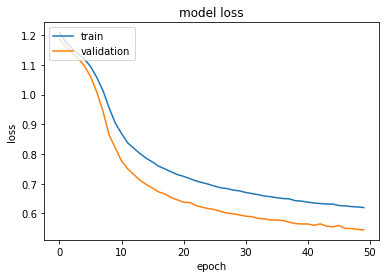

the model is rnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x000001B86F0DE100>
the confusion matrix is [[23922   515   690   446]
 [  920  6331   399   716]
 [ 2165   247  4046    50]
 [ 1560  2934   266  2302]]


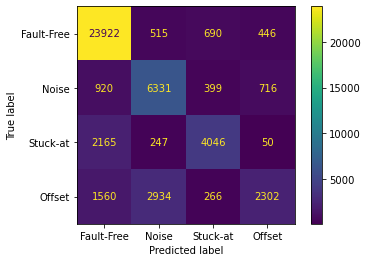

the accuracy for test is is 0.7704013976299228
              precision    recall  f1-score   support

  Fault-Free       0.84      0.94      0.88     25573
       Noise       0.63      0.76      0.69      8366
    Stuck-at       0.75      0.62      0.68      6508
      Offset       0.66      0.33      0.44      7062

    accuracy                           0.77     47509
   macro avg       0.72      0.66      0.67     47509
weighted avg       0.76      0.77      0.75     47509



In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn import metrics
yp =model.predict(X_test)
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is rnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))



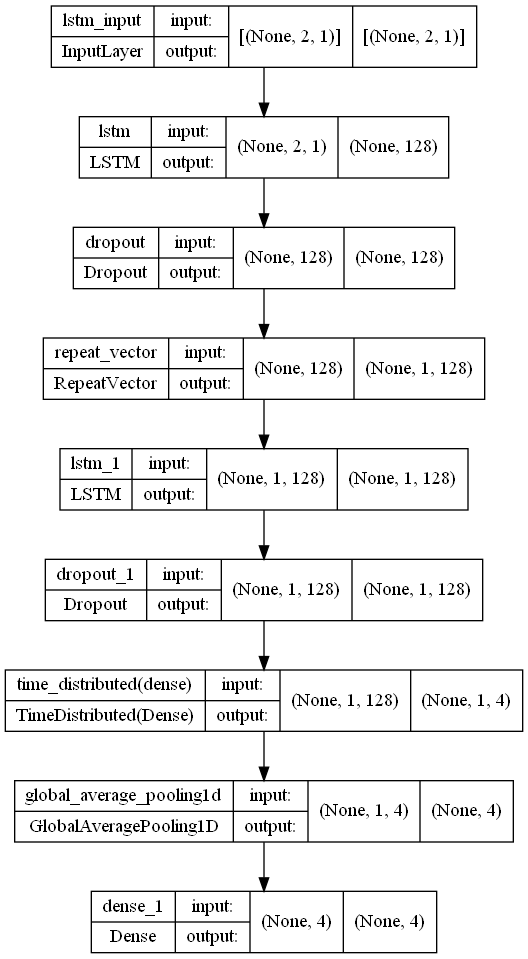

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)